### Implementing HDBSCAN to cluster spending habits of accounts

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN

In [3]:
spending_data = pd.read_csv('Proportional_spending_by_account.csv')
spending_data.head()

,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket
0,1000.0,-0.003603,0.115157,-0.013799,-0.026129,-0.038480,0.124927,0.015093,-0.007146,0.012463,-0.009759,-0.051889,-0.021443,0.046869,-0.142262
1,1002.0,0.000903,0.163846,-0.014562,-0.012116,-0.045537,-0.010689,0.020247,-0.007146,0.079114,0.002583,-0.049655,-0.030313,-0.003582,-0.093094
2,1006.0,-0.000618,-0.046949,0.013436,0.059187,-0.047891,0.073030,-0.037343,-0.007146,0.020539,-0.009759,0.158437,-0.027322,-0.003582,-0.144018
3,1018.0,-0.001904,-0.110578,-0.012793,-0.036169,0.132839,-0.063913,0.017895,-0.007146,-0.014876,-0.009759,0.123151,0.077521,-0.000928,-0.093342
4,1053.0,0.003433,-0.034050,-0.014562,-0.031265,0.151357,-0.005674,0.055473,-0.001133,0.024622,-0.009759,-0.046894,0.034151,-0.003582,-0.122116


Splitting the data into features and targets

In [5]:
X = spending_data.drop('Sender account', axis=1, errors='ignore')
hdb = HDBSCAN(min_samples=1, min_cluster_size=250)

In [6]:
cluster_labels = hdb.fit_predict(X)

spending_data['cluster_label'] = cluster_labels

In [7]:
spending_data['cluster_label'].unique()

array([ 0,  1, -1,  2,  3], dtype=int64)

Plotting the proportions for some of the accounts in a cluster

In [8]:
cluster_of_interest = 1

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=6)


In [9]:
sample_accounts.set_index('Sender account', inplace=True)
sample_accounts

,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
Sender account,,,,,,,,,,,,,,,
20818.0,0.003356,-0.056410,-0.014562,0.095521,-0.036402,0.089206,-0.063032,-0.007146,-0.022703,-0.009759,0.173092,-0.026830,-0.003582,-0.120749,1
19952.0,-0.003872,-0.099306,-0.013535,-0.039881,0.069798,0.075260,-0.048035,-0.007146,0.003992,-0.009759,0.137827,0.065907,-0.003582,-0.127670,1
24815.0,-0.003217,0.022667,0.071509,-0.041388,-0.036690,0.081588,-0.067143,-0.007146,0.028610,-0.007212,0.099494,-0.015833,-0.003582,-0.121658,1
62501.0,-0.003832,-0.050969,-0.012606,-0.025959,-0.039198,0.085767,-0.011424,-0.007146,-0.020516,0.052679,0.191854,-0.019592,-0.003582,-0.135475,1
83998.0,0.009166,0.015251,0.010873,-0.037743,-0.052308,0.092791,-0.029555,-0.007146,-0.023716,-0.009759,0.163779,-0.010848,-0.003582,-0.117203,1
100376.0,0.001341,-0.041375,0.013985,-0.027232,-0.052308,0.103338,0.042236,-0.007146,-0.019190,-0.009759,0.151747,-0.030313,-0.002009,-0.123315,1


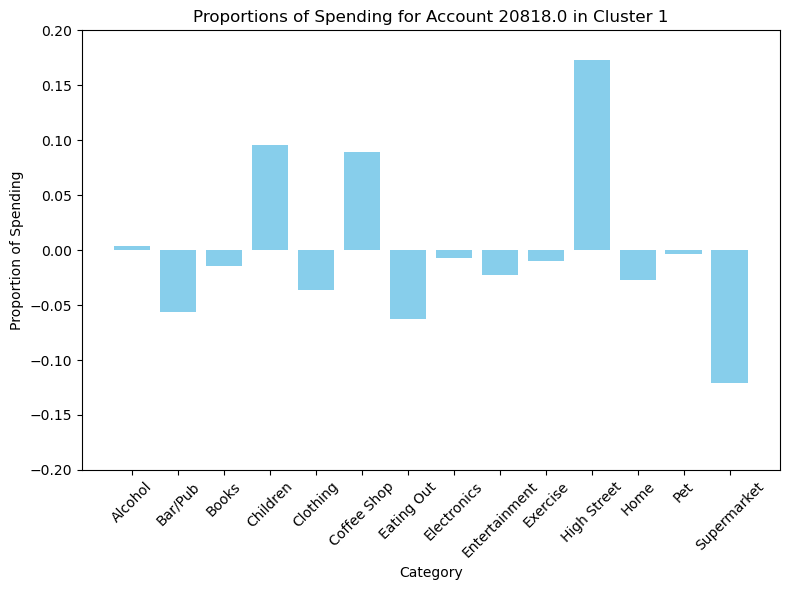

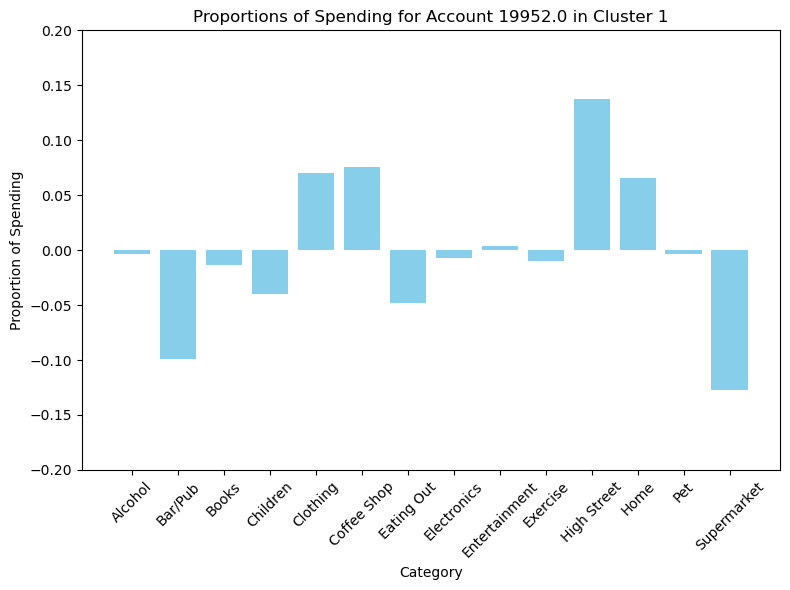

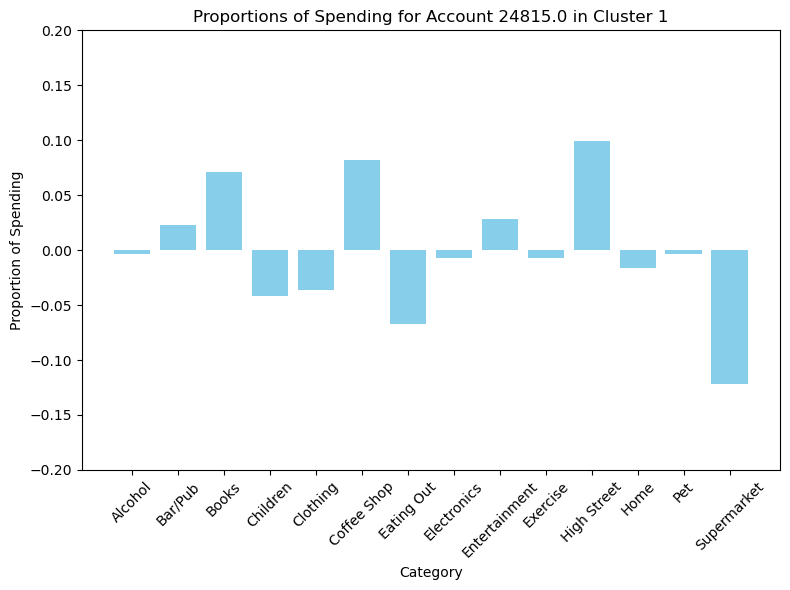

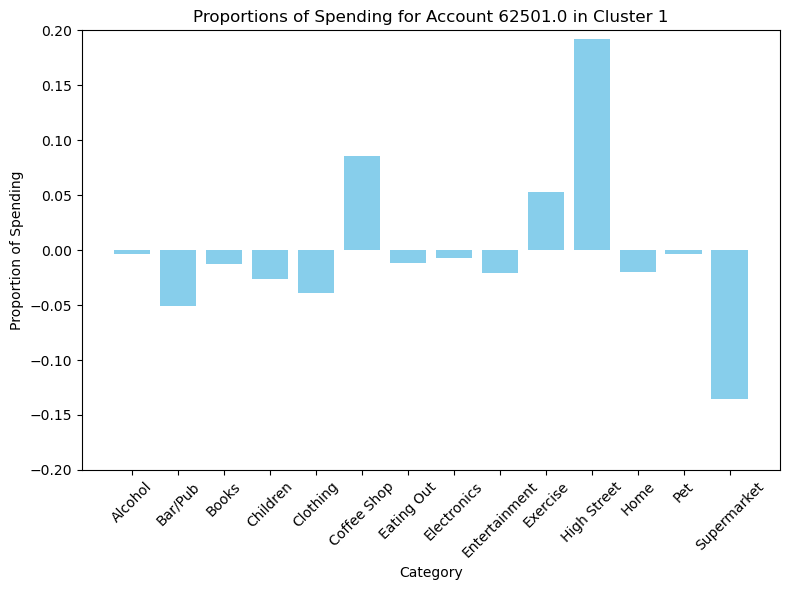

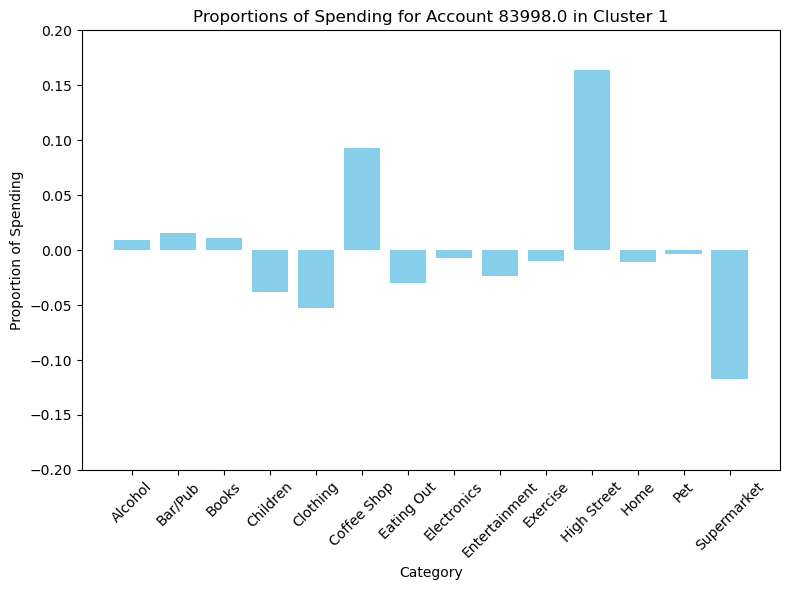

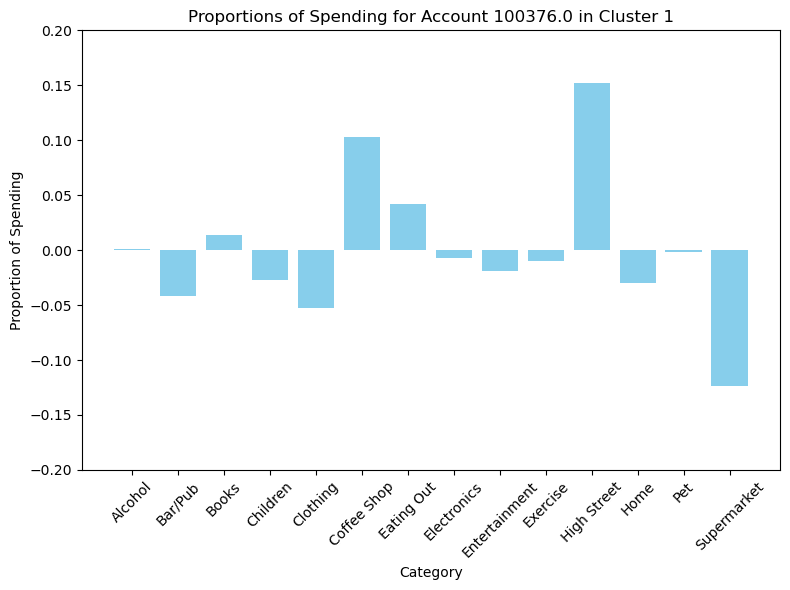

In [12]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(8, 6))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-0.2, 0.2)
    plt.tight_layout()
    plt.show()